# Analise Do Dataset Do Cancro Do Colo Do Utero

In [194]:
import numpy as np
# data processing
import pandas as pd
import  matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import seaborn as sns



# Obter dados

In [195]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv"
df = pd.read_csv(url, na_values = ["?"])

In [196]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


# Analise dos dados e pré-processamento

In [197]:
df.shape

(858, 36)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

In [199]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [200]:
# 
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/ df.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(36)

,Total,%
STDs: Time since last diagnosis,787,91.7
STDs: Time since first diagnosis,787,91.7
IUD (years),117,13.6
IUD,117,13.6
Hormonal Contraceptives,108,12.6
Hormonal Contraceptives (years),108,12.6
STDs:molluscum contagiosum,105,12.2
STDs,105,12.2
STDs (number),105,12.2
STDs:condylomatosis,105,12.2


Como mais de 60% das linhas das colunas "STDs: Time since last diagnosis" e 
"STDs: Time since first diagnosis" são valores nulos, as colunas vão ser eliminadas.

In [201]:
df = df.drop(["STDs: Time since last diagnosis", "STDs: Time since first diagnosis"], axis=1)

In [202]:
df = df.dropna()
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


Neste passo foram eliminadas todas as linhas que contem os valores nulos (NaN)

In [203]:
df.shape

(668, 34)

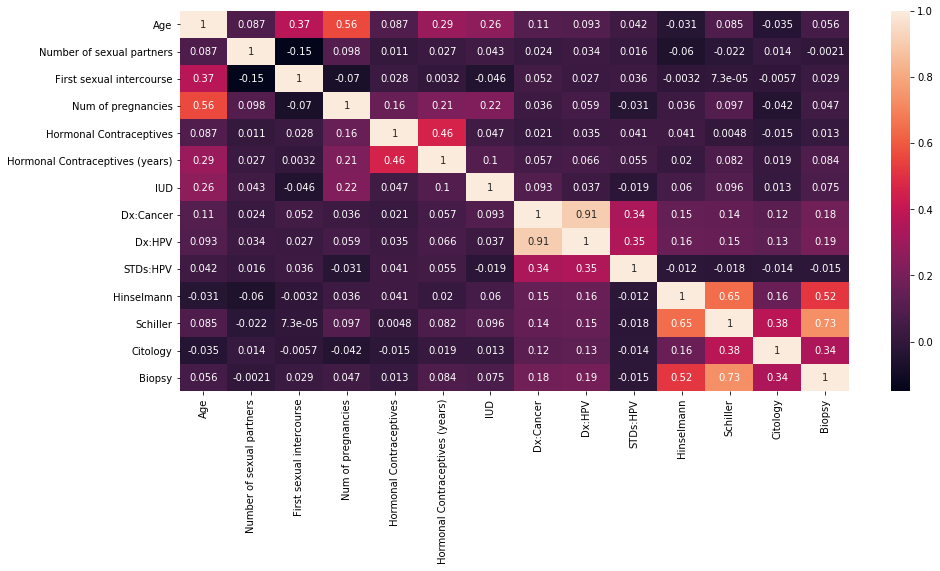

In [204]:
dff = df[["Age","Number of sexual partners","First sexual intercourse", "Num of pregnancies","Hormonal Contraceptives",
                  "Hormonal Contraceptives (years)","IUD","Dx:Cancer","Dx:HPV","STDs:HPV", 'Hinselmann','Schiller','Citology','Biopsy']]
fig, axs = plt.subplots(figsize=(15, 7), sharey=True)
sns.heatmap(dff.corr(method ='pearson'), annot=True)

In [205]:
df_features = df[["Age","Number of sexual partners","First sexual intercourse", "Num of pregnancies","Hormonal Contraceptives",
                  "Hormonal Contraceptives (years)","IUD","Dx:Cancer","Dx:HPV","STDs:HPV"]]

# df_target = df[['Hinselmann','Schiller','Citology','Biopsy']]

## Graficos de analise

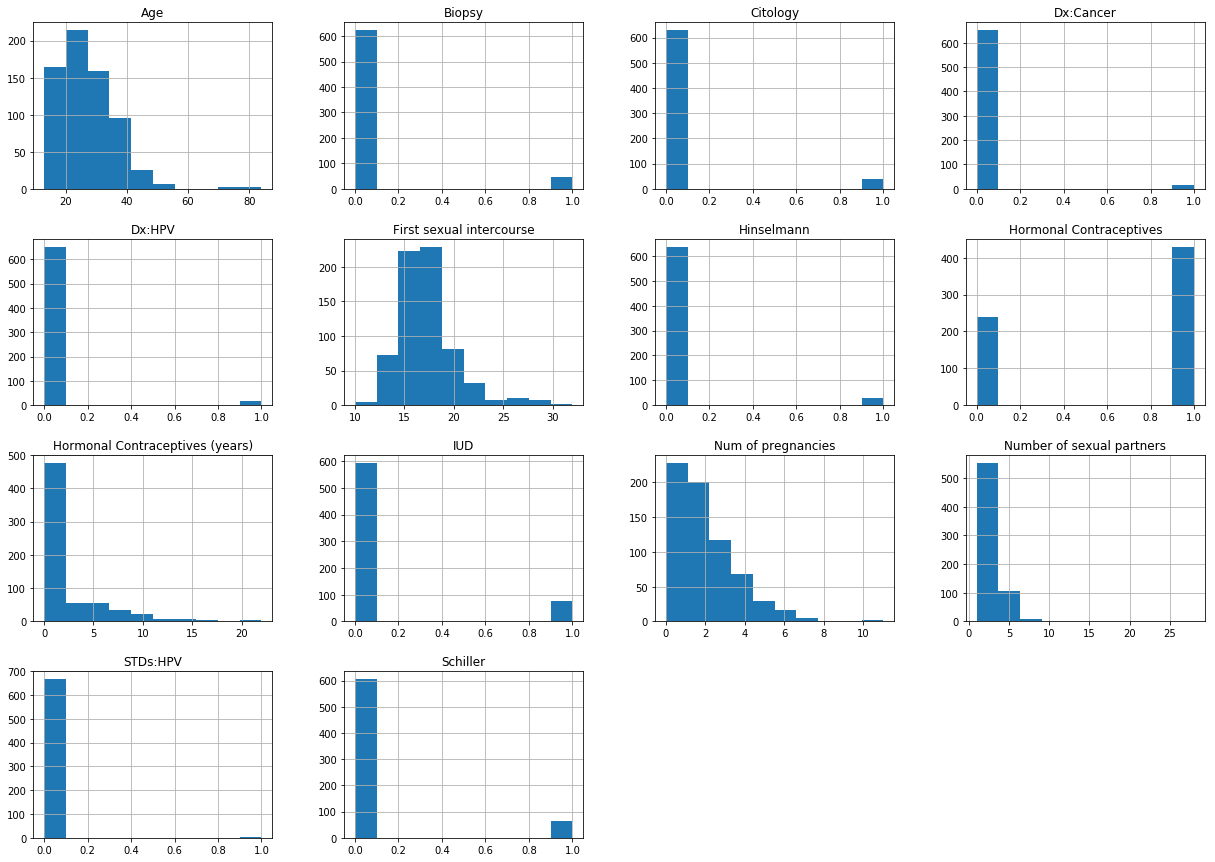

In [206]:
dff.hist()
fig = plt.gcf()
fig.set_size_inches(21,15)

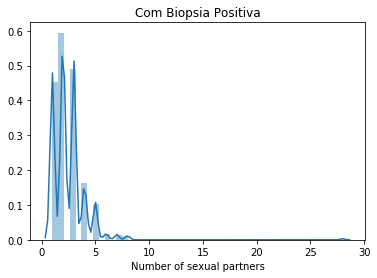

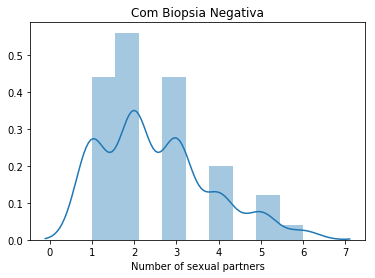

In [207]:
BiopsyPositiva = dff[dff['Biopsy'] == 0] 
BiopsyNegativa = dff[dff['Biopsy'] == 1]

plt.title("Com Biopsia Positiva")
axes = sns.distplot(BiopsyPositiva['Number of sexual partners'])
plt.show()

plt.title("Com Biopsia Negativa")
axes = sns.distplot(BiopsyNegativa['Number of sexual partners'])
plt.show()

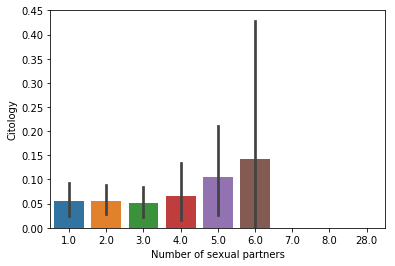

In [208]:
sns.barplot(x='Number of sexual partners', y='Citology', data=dff)

In [209]:
def histogramas_Cancro(nomePositivo,nomeNegativo,nomeTarget):
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
    ComCancro  =dff[dff['Dx:Cancer']== 1]
    SemCancro  =dff[dff['Dx:Cancer']== 0]

    ax = sns.distplot(ComCancro[ComCancro[nomeTarget]== 1].Age, bins=20, label = nomePositivo, ax = axes[0], kde =False)
    ax = sns.distplot(ComCancro[ComCancro[nomeTarget]== 0].Age, bins=20, label = nomeNegativo, ax = axes[0], kde =False)

    ax.legend()
    ax.set_title('Com Cancro')

    ax = sns.distplot(SemCancro[SemCancro[nomeTarget]==1].Age, bins=20, label = nomePositivo, ax = axes[1], kde = False)
    ax = sns.distplot(SemCancro[SemCancro[nomeTarget]==0].Age, bins=20, label = nomeNegativo, ax = axes[1], kde = False)

    ax.legend()
    _ = ax.set_title('Sem Cancro')

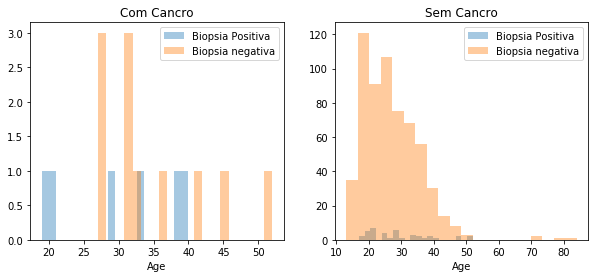

In [210]:
histogramas_Cancro('Biopsia Positiva','Biopsia negativa','Biopsy')

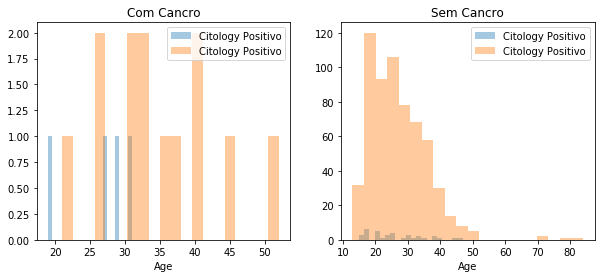

In [211]:
histogramas_Cancro('Citology Positivo','Citology Positivo','Citology')
#Hinselmann, Schiller, Citology

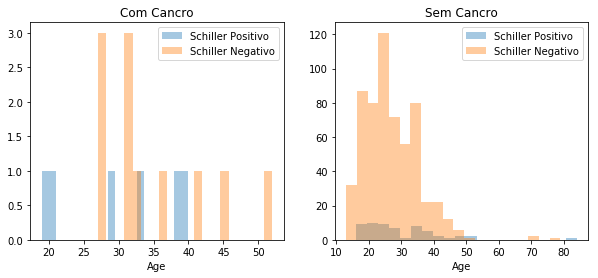

In [212]:
histogramas_Cancro('Schiller Positivo','Schiller Negativo','Schiller')

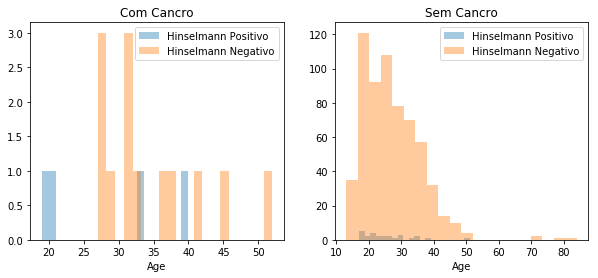

In [213]:
histogramas_Cancro('Hinselmann Positivo','Hinselmann Negativo','Hinselmann')

## Definicao de features a target que iremos utilizar

In [214]:
x = df_features
y =  df['Biopsy']

In [215]:
# dividir o dataset em treino e teste com a dimensao de teste igual a 80 %
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size = 0.80, random_state = 42)

In [216]:
#Standartizar
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [217]:
def MatrizConfucao(nomeMetodo, y, y_pred):
    cm = confusion_matrix(y, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Matriz de Confusão\n'+ nomeMetodo)
    plt.ylabel('Label Experada')
    plt.xlabel('Label Prevista')

    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    return plt.show()

# Regressao Logistica

93.82
Accuracy: 93.82
Scores: [0.92178771 0.94382022 0.93785311]


C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


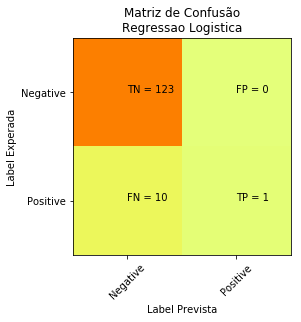

In [218]:
import numpy as np
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(x_train, y_train)
acc = round(logreg.score(x_train, y_train) * 100, 2)
y_predicted = logreg.predict(x_test)

scores = cross_val_score(logreg, x_train, y_train,  scoring = "accuracy")
acc_log = round(logreg.score(x_train, y_train) * 100, 2)

print(acc)
print("Accuracy:", acc_log)

print("Scores:", scores)

MatrizConfucao('Regressao Logistica', y_test, y_predicted)

# Arvore de Decisão

Accuracy: 0.9104477611940298


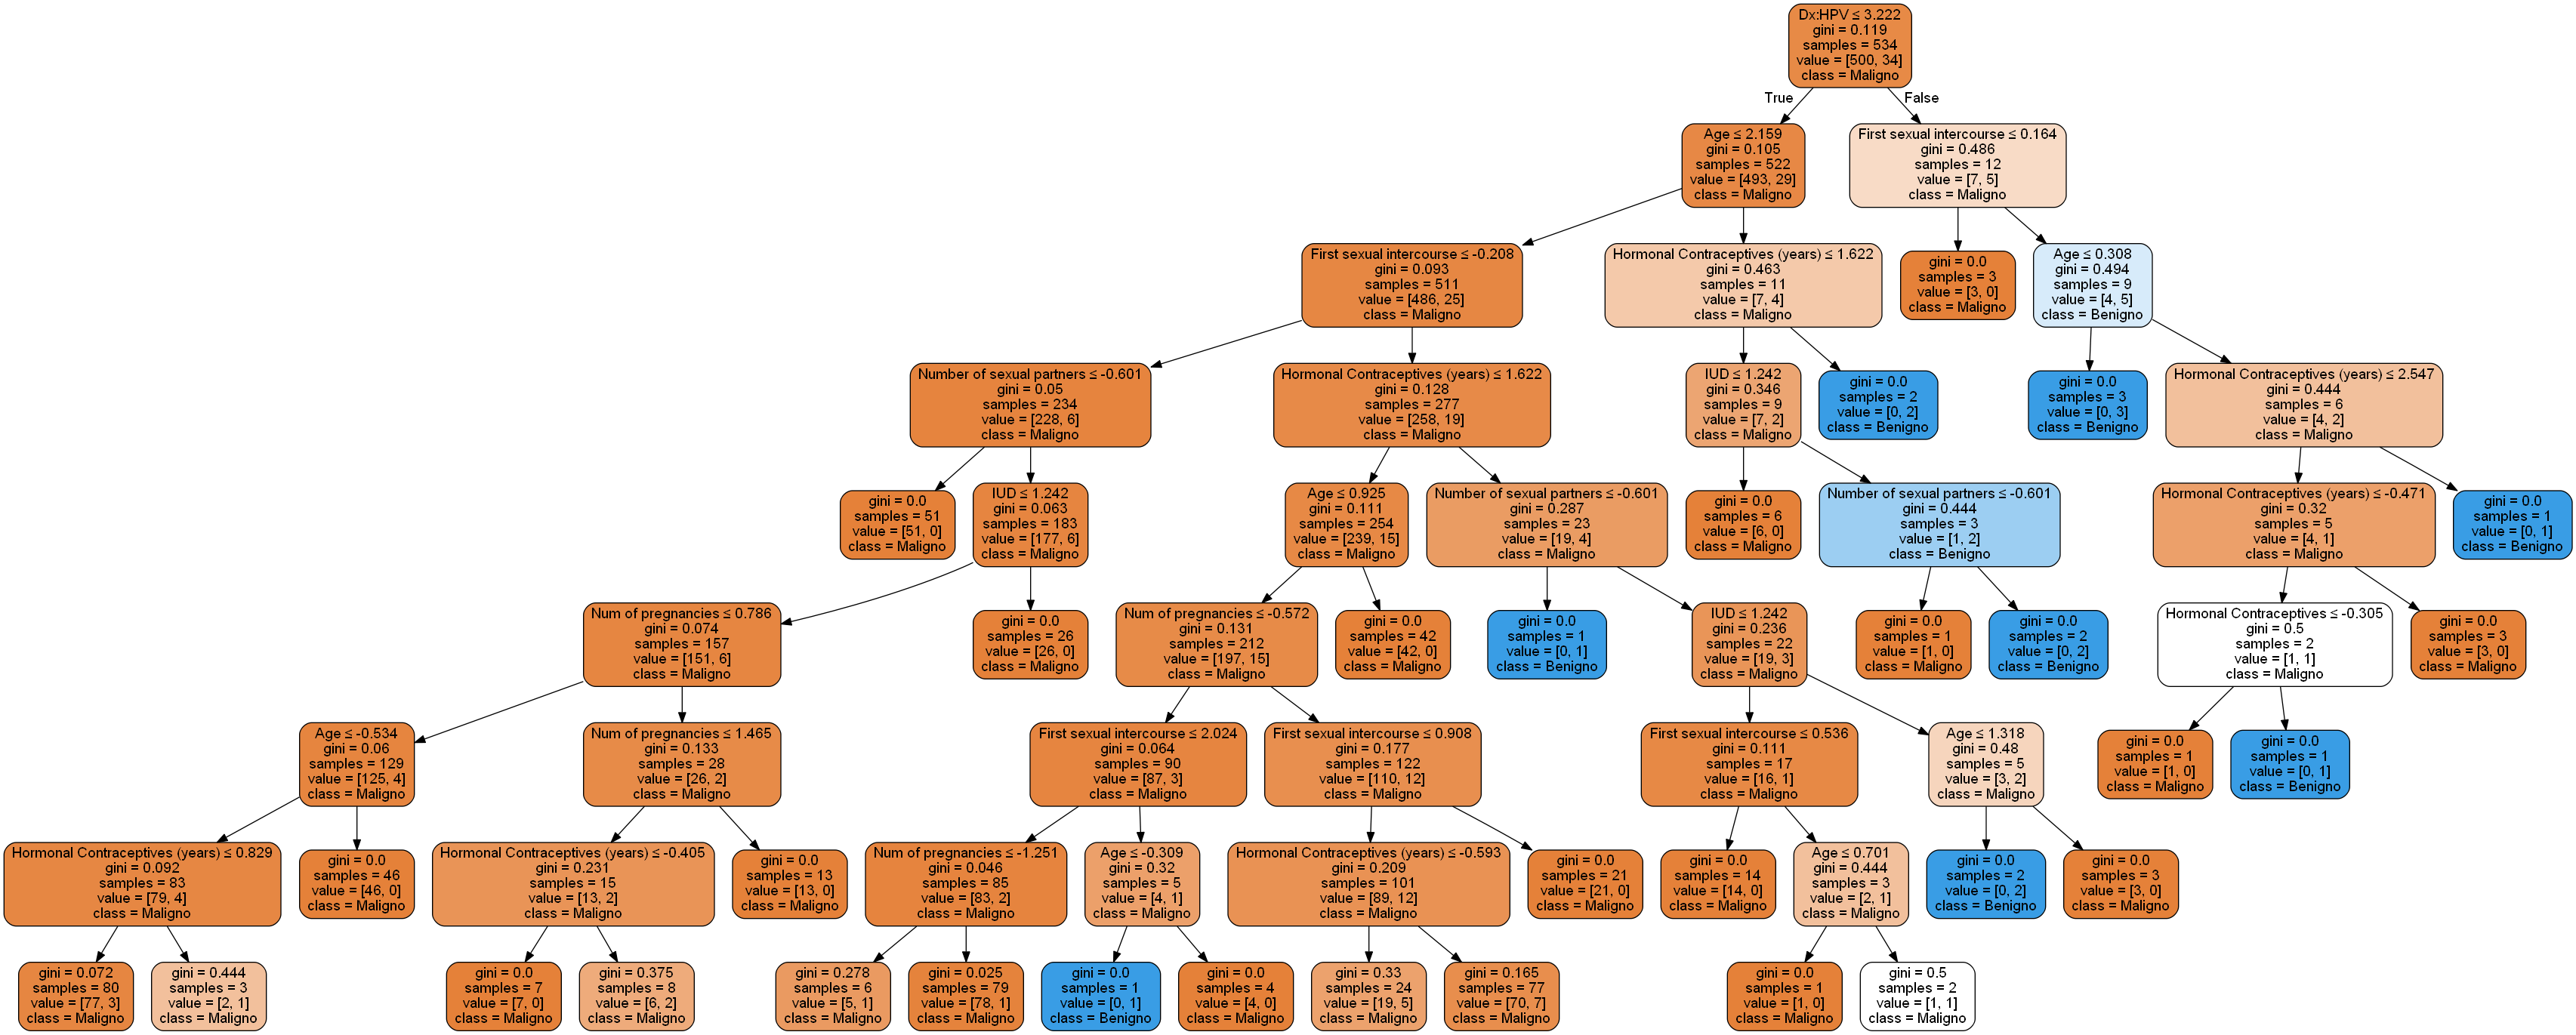

In [219]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from io import StringIO
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from IPython.display import Image

depth = 8
# Create Decision Tree classifer object
DTC = DecisionTreeClassifier(max_depth= depth)
# Train Decision Tree Classifer
DTC = DTC.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = DTC.predict(x_test)
# Model Accuracy, how often is the classifier correct?


dot_data = StringIO()

export_graphviz(DTC, out_file=dot_data,
                feature_names = ["Age","Number of sexual partners","First sexual intercourse", "Num of pregnancies","Hormonal Contraceptives",
                                 "Hormonal Contraceptives (years)","IUD","Dx:Cancer","Dx:HPV","STDs:HPV"], 
                class_names = ['Maligno','Benigno'],
                filled=True, rounded=True, 
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
Image(graph.create_png())


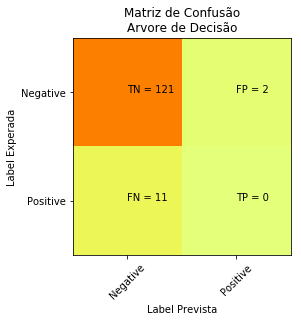

In [220]:
MatrizConfucao('Arvore de Decisão', y_test, y_predict_DTC)

# Naive Bayes

In [221]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_predict_Naive= gnb.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,  y_predict_Naive))

Accuracy: 0.12686567164179105


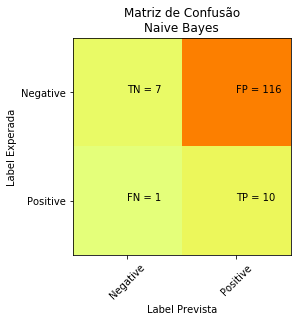

In [222]:
MatrizConfucao('Naive Bayes', y_test, y_predict_GNB)

# KNN

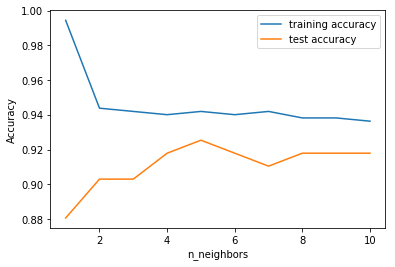

In [223]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #build a model
    KNN = KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN.fit(x_train,y_train)
    
    #record training set accuracy
    training_accuracy.append(KNN.score(x_train,y_train))
    #record generalization accuracy
    test_accuracy.append(KNN.score(x_test,y_test))

plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [224]:
from sklearn.neighbors import KNeighborsClassifier  
KNN = KNeighborsClassifier(n_neighbors=2)  
KNN.fit(x_train, y_train)
y_predict_KNN = KNN.predict(x_test) 
print("Accuracy:",metrics.accuracy_score(y_test,  y_predict_KNN))

Accuracy: 0.9029850746268657


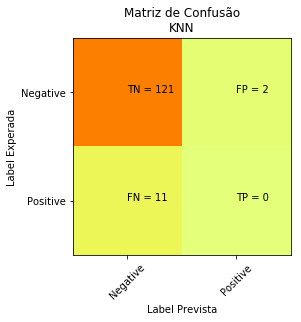

In [225]:
MatrizConfucao('KNN', y_test, y_predict_KNN)

Text(0,0.5,'Mean Error')

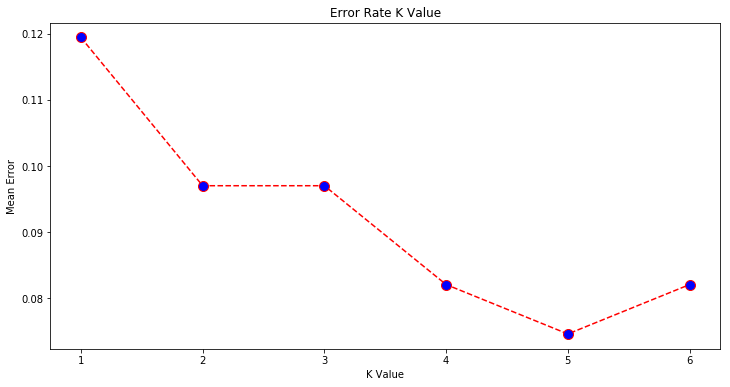

In [226]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 7):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 7), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

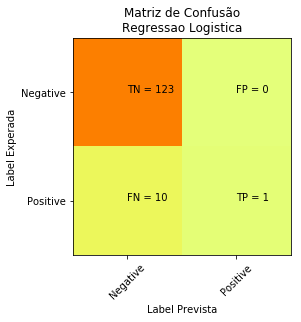

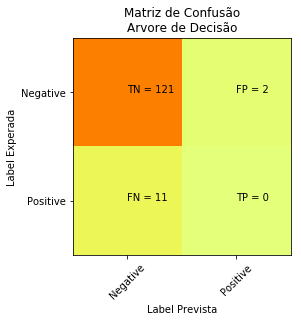

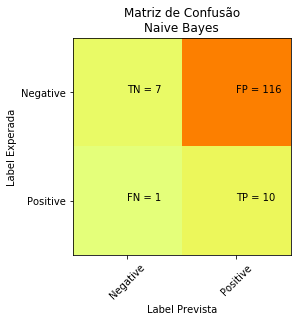

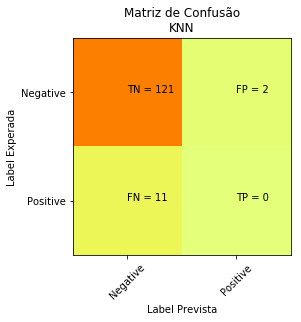

In [227]:
# Melhot albboritmo seria a regressao logistica
MatrizConfucao('Regressao Logistica', y_test, y_predicted)
MatrizConfucao('Arvore de Decisão', y_test, y_predict_DTC)
MatrizConfucao('Naive Bayes', y_test, y_predict_GNB)
MatrizConfucao('KNN', y_test, y_predict_KNN)